In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [ ]:
#For google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#Your path
%cd '/content/drive/MyDrive/project/'


Mounted at /content/drive
/content/drive/MyDrive/project


In [ ]:
#view of a sample of data
df=pd.read_csv("data/A1Benchmark/real_1.csv")
df

,timestamp,value,is_anomaly,value_processed
0,1,0.000000,0,-1.683347
1,2,0.091758,0,0.516822
2,3,0.172297,0,1.870965
3,4,0.226219,0,2.562923
4,5,0.176358,0,1.768408
...,...,...,...,...
1415,1416,0.159675,0,1.375431
1416,1417,0.137626,0,1.541843
1417,1418,0.197441,0,1.828341
1418,1419,0.161966,0,1.484001


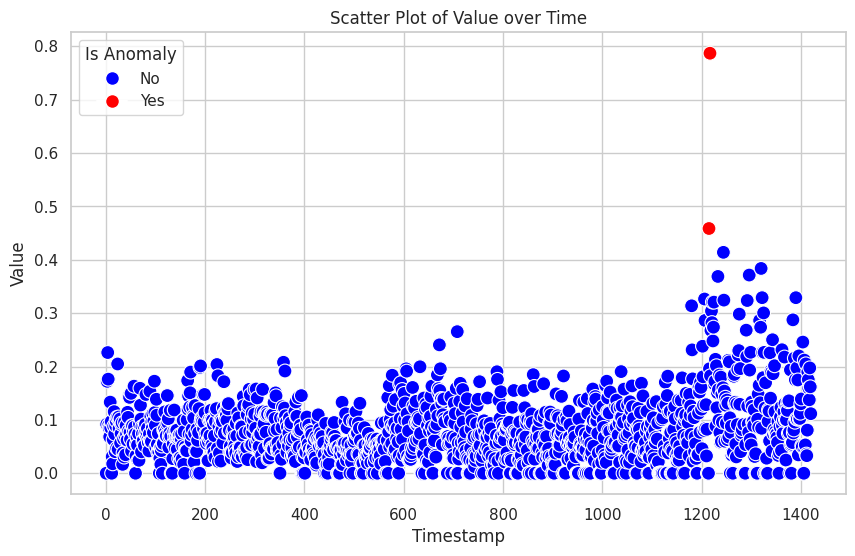

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='timestamp', y='value', hue='is_anomaly', data=df, palette={0: 'blue', 1: 'red'}, s=100)

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
]

# Add legend with custom handles
plt.legend(handles=legend_handles, title='Is Anomaly', labels=['No', 'Yes'], loc='upper left')


# Set plot title and labels
plt.title('Scatter Plot of Value over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
#Convert 0 in value to NaN and drop
df['value'] = df['value'].replace(0, np.nan)
df = df.dropna(subset=['value'])
df.value = preprocessing.normalize([df.value]).T

<ipython-input-16-f679f6d9179a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.value = preprocessing.normalize([df.value]).T


In [ ]:
df

,timestamp,value,is_anomaly,value_processed
1,2,0.023933,0,0.516822
2,3,0.044939,0,1.870965
3,4,0.059003,0,2.562923
4,5,0.045998,0,1.768408
5,6,0.023602,0,0.544173
...,...,...,...,...
1415,1416,0.041647,0,1.375431
1416,1417,0.035896,0,1.541843
1417,1418,0.051497,0,1.828341
1418,1419,0.042245,0,1.484001


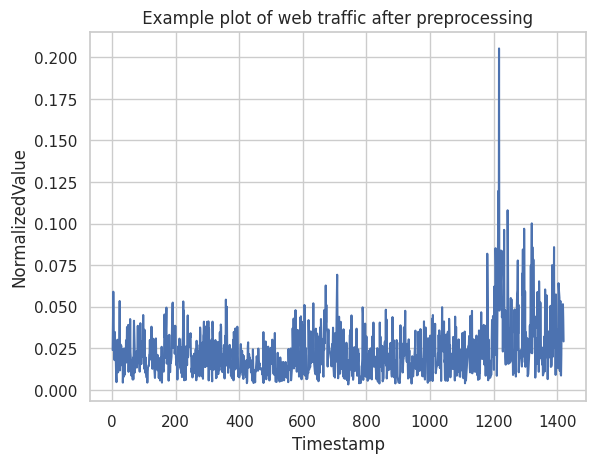

In [ ]:
plt.plot(df.timestamp,df.value)
plt.xlabel("Timestamp")
plt.ylabel("NormalizedValue")
plt.title(" Example plot of web traffic after preprocessing ")
plt.show()

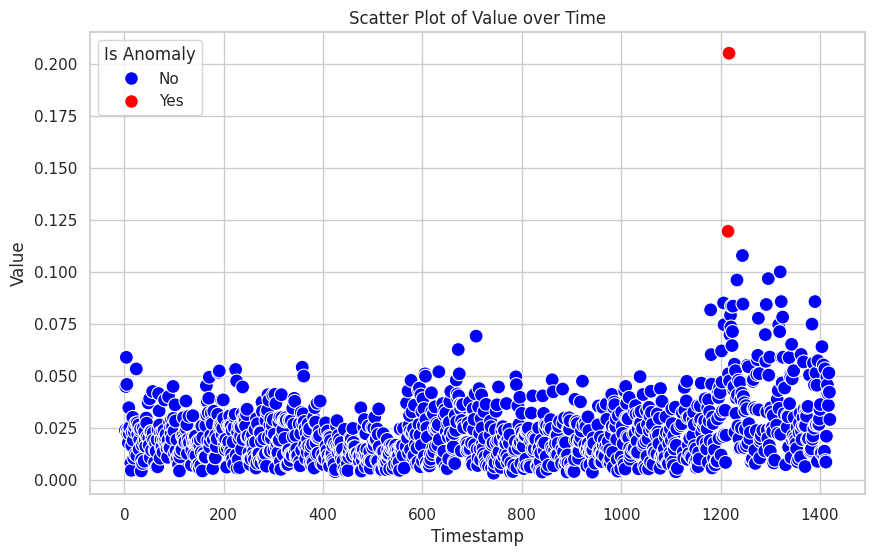

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='timestamp', y='value', hue='is_anomaly', data=df, palette={0: 'blue', 1: 'red'}, s=100)

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
]

# Add legend with custom handles
plt.legend(handles=legend_handles, title='Is Anomaly', labels=['No', 'Yes'], loc='upper left')


# Set plot title and labels
plt.title('Scatter Plot of Value over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
#function to convert dataframe to into 2d array
#creating sliding window of length 60 values in a sequence

def convert_2d(df):
    rows = []

    for i in range(len(df) - 59):
        segment = df.iloc[i:i+60]
        is_anomaly = segment['is_anomaly'].any()
        new_row = segment['value'].tolist() + [int(is_anomaly)]
        rows.append(new_row)
    data_frame = pd.DataFrame(rows)

    return data_frame

In [ ]:
#test on sample
df2 = convert_2d(df)
df2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.023933,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,...,0.023166,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0
1,0.044939,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,...,0.014312,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0
2,0.059003,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,...,0.020640,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0
3,0.045998,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,...,0.042561,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0
4,0.023602,0.022068,0.017847,0.034768,0.022177,0.025319,0.008102,0.004625,0.016524,0.022919,...,0.022618,0.019144,0.008544,0.014318,0.017870,0.013770,0.006221,0.019369,0.006319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,0.017441,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,...,0.011454,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0
1214,0.015098,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,...,0.013848,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0
1215,0.025371,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,...,0.053461,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0
1216,0.008678,0.009982,0.022765,0.027482,0.032185,0.011102,0.060374,0.023431,0.019470,0.025885,...,0.009340,0.008602,0.021073,0.049554,0.045743,0.041647,0.035896,0.051497,0.042245,0


In [ ]:
anomalies_df = df2[df2[60] == 1]

anomalies_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
1032,0.008781,0.014987,0.006001,0.009813,0.006981,0.035709,0.006411,0.013230,0.010122,0.027990,...,0.033234,0.020930,0.085175,0.074699,0.021883,0.033525,0.008454,0.021485,0.119636,1
1033,0.014987,0.006001,0.009813,0.006981,0.035709,0.006411,0.013230,0.010122,0.027990,0.035600,...,0.020930,0.085175,0.074699,0.021883,0.033525,0.008454,0.021485,0.119636,0.051098,1
1034,0.006001,0.009813,0.006981,0.035709,0.006411,0.013230,0.010122,0.027990,0.035600,0.029189,...,0.085175,0.074699,0.021883,0.033525,0.008454,0.021485,0.119636,0.051098,0.205301,1
1035,0.009813,0.006981,0.035709,0.006411,0.013230,0.010122,0.027990,0.035600,0.029189,0.046633,...,0.074699,0.021883,0.033525,0.008454,0.021485,0.119636,0.051098,0.205301,0.047647,1
1036,0.006981,0.035709,0.006411,0.013230,0.010122,0.027990,0.035600,0.029189,0.046633,0.022765,...,0.021883,0.033525,0.008454,0.021485,0.119636,0.051098,0.205301,0.047647,0.069843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.008454,0.021485,0.119636,0.051098,0.205301,0.047647,0.069843,0.079303,0.073622,0.083706,...,0.048307,0.034115,0.034716,0.014280,0.007978,0.033902,0.023735,0.050768,0.057847,1
1090,0.021485,0.119636,0.051098,0.205301,0.047647,0.069843,0.079303,0.073622,0.083706,0.064667,...,0.034115,0.034716,0.014280,0.007978,0.033902,0.023735,0.050768,0.057847,0.059947,1
1091,0.119636,0.051098,0.205301,0.047647,0.069843,0.079303,0.073622,0.083706,0.064667,0.071405,...,0.034716,0.014280,0.007978,0.033902,0.023735,0.050768,0.057847,0.059947,0.077785,1
1092,0.051098,0.205301,0.047647,0.069843,0.079303,0.073622,0.083706,0.064667,0.071405,0.083644,...,0.014280,0.007978,0.033902,0.023735,0.050768,0.057847,0.059947,0.077785,0.033707,1


In [ ]:
#Import and concat all files
path = r'data/A1Benchmark' #set the path accordingly
all_files=glob.glob(path+"/*.csv")


In [ ]:
preprocessed_dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['value'] = df['value'].replace(0, np.nan)
    df = df.dropna(subset=['value'])

    # Normalize the 'value' column
    normalized_values = preprocessing.normalize([df['value'].to_numpy()])[0]
    df['value'] = normalized_values

    preprocessed_dfs.append(df)

concatenated_df = pd.concat(preprocessed_dfs, axis=0, ignore_index=True)

In [ ]:
concatenated_df

,timestamp,value,is_anomaly,value_processed
0,1,0.035790,0,1.256625
1,2,0.030838,0,1.049099
2,3,0.031739,0,0.957822
3,4,0.035565,0,1.155015
4,5,0.032189,0,1.051683
...,...,...,...,...
92673,1428,0.033727,0,1.663347
92674,1429,0.034795,0,1.882905
92675,1430,0.034609,0,1.902965
92676,1431,0.034408,0,1.857381


In [ ]:
concatenated_df.to_csv('output.csv', index=False)

In [ ]:
frame = convert_2d(concatenated_df)

In [ ]:
frame

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.035790,0.030838,0.031739,0.035565,0.032189,0.031739,0.034215,0.029037,0.034215,0.033314,...,0.026786,0.025211,0.032414,0.028812,0.032864,0.029488,0.032414,0.029938,0.029713,0
1,0.030838,0.031739,0.035565,0.032189,0.031739,0.034215,0.029037,0.034215,0.033314,0.026561,...,0.025211,0.032414,0.028812,0.032864,0.029488,0.032414,0.029938,0.029713,0.029938,0
2,0.031739,0.035565,0.032189,0.031739,0.034215,0.029037,0.034215,0.033314,0.026561,0.028587,...,0.032414,0.028812,0.032864,0.029488,0.032414,0.029938,0.029713,0.029938,0.029488,0
3,0.035565,0.032189,0.031739,0.034215,0.029037,0.034215,0.033314,0.026561,0.028587,0.027912,...,0.028812,0.032864,0.029488,0.032414,0.029938,0.029713,0.029938,0.029488,0.027687,0
4,0.032189,0.031739,0.034215,0.029037,0.034215,0.033314,0.026561,0.028587,0.027912,0.029713,...,0.032864,0.029488,0.032414,0.029938,0.029713,0.029938,0.029488,0.027687,0.029713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92614,0.021570,0.024537,0.028353,0.029421,0.030325,0.026436,0.030634,0.030787,0.030777,0.030730,...,0.030570,0.030451,0.030865,0.031607,0.030936,0.031115,0.031030,0.031940,0.033727,0
92615,0.024537,0.028353,0.029421,0.030325,0.026436,0.030634,0.030787,0.030777,0.030730,0.031399,...,0.030451,0.030865,0.031607,0.030936,0.031115,0.031030,0.031940,0.033727,0.034795,0
92616,0.028353,0.029421,0.030325,0.026436,0.030634,0.030787,0.030777,0.030730,0.031399,0.032910,...,0.030865,0.031607,0.030936,0.031115,0.031030,0.031940,0.033727,0.034795,0.034609,0
92617,0.029421,0.030325,0.026436,0.030634,0.030787,0.030777,0.030730,0.031399,0.032910,0.034034,...,0.031607,0.030936,0.031115,0.031030,0.031940,0.033727,0.034795,0.034609,0.034408,0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class CLSTM(nn.Module):
    def __init__(self):
        super(CLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(2, stride=2)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=5, stride=1, padding=2)
        self.lstm = nn.LSTM(input_size=960, hidden_size=64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 2)
        self.tanh = nn.Tanh()
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.pool(x)
        x = self.tanh(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1, 960)

        x, _ = self.lstm(x)
        x = self.flatten(x)
        #x = x.contiguous().view(x.size(0), -1)
        x = self.tanh(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [ ]:
y = frame.iloc[:, 60]
X = frame.iloc[:, 0:60]

# Train-test split
#no shuffling since we are using sliding window
train_size = int(0.7 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
#convert to tensors
X_train = torch.tensor(X_train.values.reshape(train_size, 1, 60)).float()
X_test = torch.tensor(X_test.values.reshape(len(X_test), 1, 60)).float()

y_train = torch.tensor(pd.get_dummies(y_train).values).float()
y_test = torch.tensor(pd.get_dummies(y_test).values).float()

In [ ]:
batch_size=512

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
model = CLSTM()

In [ ]:
# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
#Total parameters
sum(p.numel() for p in model.parameters())

285730

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CLSTM(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (lstm): LSTM(960, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (tanh): Tanh()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [ ]:
# Train
epochs = 100

epoch_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    batch_loss = loss.item()
    epoch_losses.append(average_loss)
    print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Loss: {batch_loss}')

Epoch 1, Batch 127, Loss: 0.3771679699420929
Epoch 2, Batch 127, Loss: 0.33201977610588074
Epoch 3, Batch 127, Loss: 0.2309459000825882
Epoch 4, Batch 127, Loss: 0.22855322062969208
Epoch 5, Batch 127, Loss: 0.19505973160266876
Epoch 6, Batch 127, Loss: 0.21345984935760498
Epoch 7, Batch 127, Loss: 0.2552180588245392
Epoch 8, Batch 127, Loss: 0.19633249938488007
Epoch 9, Batch 127, Loss: 0.1828833669424057
Epoch 10, Batch 127, Loss: 0.1596023589372635
Epoch 11, Batch 127, Loss: 0.13426852226257324
Epoch 12, Batch 127, Loss: 0.18924404680728912
Epoch 13, Batch 127, Loss: 0.2164018750190735
Epoch 14, Batch 127, Loss: 0.13131068646907806
Epoch 15, Batch 127, Loss: 0.17849256098270416
Epoch 16, Batch 127, Loss: 0.1535157561302185
Epoch 17, Batch 127, Loss: 0.14353522658348083
Epoch 18, Batch 127, Loss: 0.11043640971183777
Epoch 19, Batch 127, Loss: 0.15809422731399536
Epoch 20, Batch 127, Loss: 0.11606872081756592
Epoch 21, Batch 127, Loss: 0.10944186896085739
Epoch 22, Batch 127, Loss: 0.

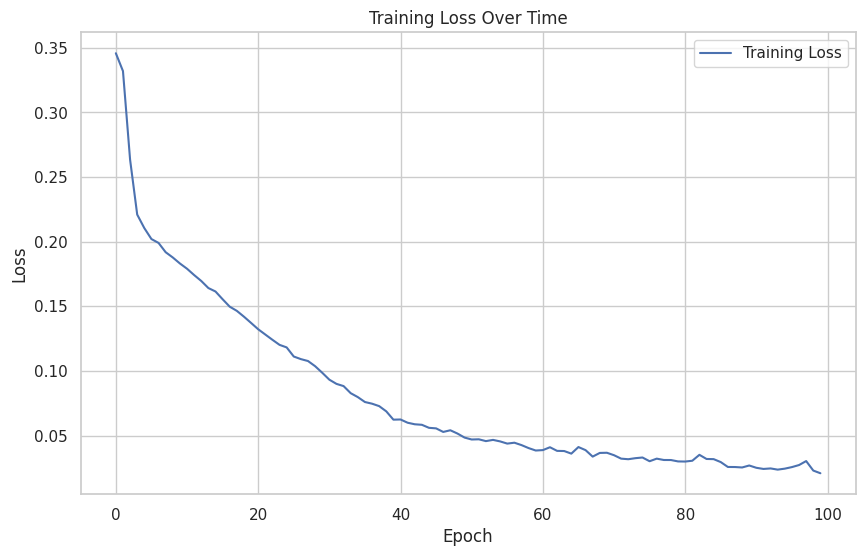

In [ ]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicted = torch.argmax(outputs, 1)
        total += targets.size(0)
        correct += (predicted == torch.argmax(targets, 1)).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 89.75743180018715%


## **Anomaly Detection with Autoencoders**

In [10]:
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#For google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#Your path
%cd '/content/drive/MyDrive/project/'

Mounted at /content/drive
/content/drive/MyDrive/project


In [8]:
#Import and concat all files
path = r'S5_database/A1Benchmark' #set the path accordingly
all_files=glob.glob(path+"/*.csv")

In [26]:
preprocessed_dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['value'] = df['value'].replace(0, np.nan)
    df = df.dropna(subset=['value'])

    # Normalize the 'value' column
    normalized_values = preprocessing.normalize([df['value'].to_numpy()])[0]
    df['value'] = normalized_values

    preprocessed_dfs.append(df)

concatenated_df = pd.concat(preprocessed_dfs, axis=0, ignore_index=True)

<ipython-input-26-0352ca33db68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = normalized_values


In [27]:
concatenated_df

,timestamp,value,is_anomaly
0,2,0.000160,0
1,3,0.005802,0
2,4,0.007163,0
3,5,0.006523,0
4,6,0.006923,0
...,...,...,...
92673,1416,0.023491,0
92674,1417,0.024053,0
92675,1418,0.025006,0
92676,1419,0.027977,0


[[27220    88]
 [  239   257]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27308
           1       0.74      0.52      0.61       496

    accuracy                           0.99     27804
   macro avg       0.87      0.76      0.80     27804
weighted avg       0.99      0.99      0.99     27804



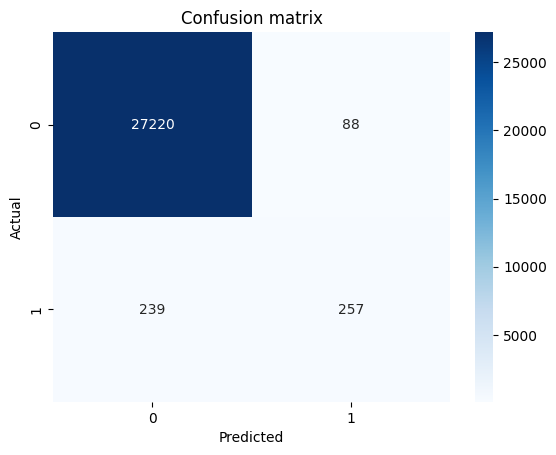

In [28]:
# first try random forest and see how the model performs

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(concatenated_df.drop('is_anomaly', axis=1), concatenated_df['is_anomaly'], test_size=0.3, random_state=42)

# Creating a Random Forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# Fitting the Random Forest classifier to the training data
rfc.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rfc.predict(X_test)

# Printing the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

**Anomaly Detection with Autoencoders**

In [21]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1, 16),
            nn.ELU(True),
            nn.Linear(16, 8),
            nn.ELU(True),
            nn.Linear(8, 4),
            nn.ELU(True))
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ELU(True),
            nn.Linear(8, 16),
            nn.ELU(True),
            nn.Linear(16, 1),
            nn.ELU(True))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [29]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(concatenated_df, test_size=0.2, random_state=42)

# Normalize the 'value' column in both training and testing sets
train_data['value'] = preprocessing.normalize([train_data['value']]).T
test_data['value'] = preprocessing.normalize([test_data['value']]).T

# Separate the non-anomaly cases in the training set
non_anomaly_data_train = train_data[train_data.is_anomaly == 0].iloc[:, 1:2].values


In [30]:
non_anomaly_data

array([[1.95553484e-05],
       [7.08881378e-04],
       [8.75101840e-04],
       ...,
       [3.05496456e-03],
       [3.41799054e-03],
       [3.42041119e-03]])

In [31]:
# Initialize the autoencoder
autoencoder = Autoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)

# Train the autoencoder on the training set
num_epochs = 20
batch_size = 256
for epoch in range(num_epochs):
    np.random.shuffle(non_anomaly_data_train)
    for i in range(0, len(non_anomaly_data_train), batch_size):
        batch = non_anomaly_data_train[i:i+batch_size]
        batch = torch.FloatTensor(batch)
        optimizer.zero_grad()
        outputs = autoencoder(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the autoencoder on the testing set
non_anomaly_data_test = test_data[test_data.is_anomaly == 0].iloc[:, 1:2].values
test_batch = torch.FloatTensor(non_anomaly_data_test)
test_outputs = autoencoder(test_batch)
test_loss = criterion(test_outputs, test_batch)
print('Test Loss: {:.4f}'.format(test_loss.item()))

Epoch [1/20], Loss: 0.0000
Epoch [2/20], Loss: 0.0000
Epoch [3/20], Loss: 0.0000
Epoch [4/20], Loss: 0.0000
Epoch [5/20], Loss: 0.0000
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0000
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0000
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0000
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Test Loss: 0.0000
